In [2]:
!pip install networkx==2.3
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.4 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556008 sha256=afc62a71eeac46859a7853b8ee4263fc0a042e974acc047f59584b2962a8c0fd
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |█████████

Logica difusa para determinar el sabor del ramen
Entrada:
temperatura: fria, tibia, caliente 
consistencia: dura, cocida, suave


Salida:
sabor: malo, decente, rico

Reglas:
Si la temperatura es caliente y la consistencia es suave, el sabor del ramen es rico
Si la temperatura es tibia y la consistencia es cocida, el sabor del ramen es decente
Si la temperatura es fria y la consistencia es dura, el sabor del ramen es malo

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


temperatura = ctrl.Antecedent(np.arange(0, 11, 1), 'temperatura')
consistencia = ctrl.Antecedent(np.arange(0, 11, 1), 'consistencia')
sabor = ctrl.Consequent(np.arange(0, 11, 1), 'sabor')


consistencia.automf(names=['dura', 'cocida', 'suave'])
temperatura.automf(names=['fria', 'tibia', 'caliente'])

sabor['malo'] = fuzz.trimf(sabor.universe, [0, 0, 5])
sabor['decente'] = fuzz.trimf(sabor.universe, [0, 5, 10])
sabor['rico'] = fuzz.trimf(sabor.universe, [5, 10, 10])

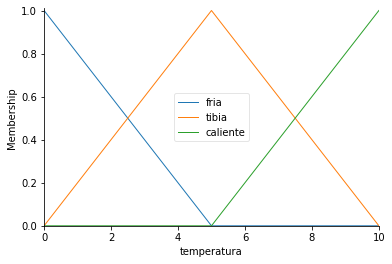

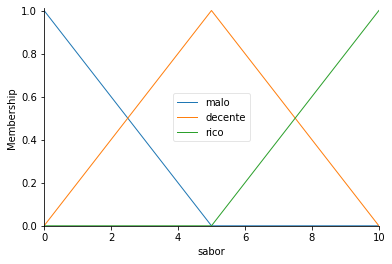

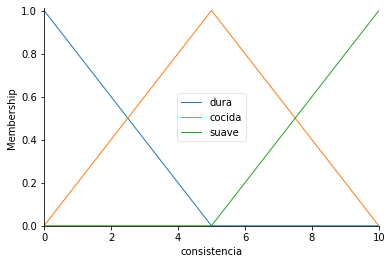

In [13]:
temperatura.view()
sabor.view()
consistencia.view()

In [14]:
R1 = ctrl.Rule(temperatura['caliente'] & consistencia['suave'], sabor['rico'])
R2 = ctrl.Rule(consistencia['cocida'], sabor['decente'])
R3 = ctrl.Rule(temperatura['fria'] | consistencia['dura'], sabor['malo'])
R4 = ctrl.Rule(temperatura['tibia'] & consistencia['cocida'], sabor['decente'])

In [15]:
sabor_ctrl = ctrl.ControlSystem([R1,R2,R3,R4])
sabor_sim = ctrl.ControlSystemSimulation(sabor_ctrl)

sabor_sim.input['temperatura'] = 8.3
sabor_sim.input['consistencia'] =9.5

sabor_sim.compute()

In [19]:
# Temperatura
print("*****Temperatura*****")
input = 8.3
for t in temperatura.terms: 
  mval = np.interp(input, temperatura.universe, temperatura[t].mf)
  print(t, mval)

# Sabor
print("\n*****Sabor*****")
input = 9.5
for t in sabor.terms: 
  mval = np.interp(input, sabor.universe, sabor[t].mf)
  print(t, mval)

*****Temperatura*****
fria 0.0
tibia 0.33999999999999986
caliente 0.6600000000000001

*****Sabor*****
malo 0.0
decente 0.1
rico 0.9


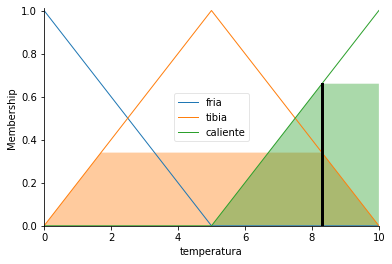

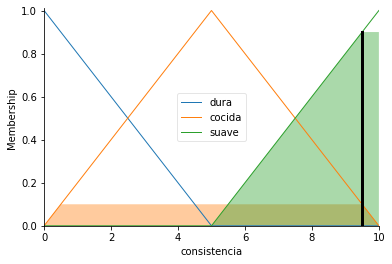

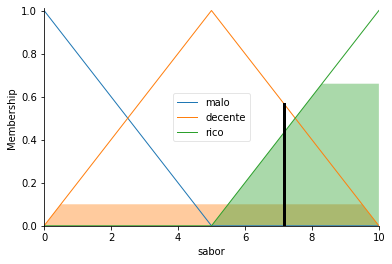

In [20]:
temperatura.view(sim=sabor_sim)
consistencia.view(sim=sabor_sim)
sabor.view(sim=sabor_sim)

In [21]:
print("sabor :",sabor_sim.output['sabor'])

sabor : 7.17090643274854
